<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Amirreza Zameni

**Student ID**: 400101504



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [1]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

This data set has 14 columns and 507 rows.<br>
Each row of the data set contains 13 features and 1 target (last column).<br>
Attributes in each case of the dataset are:<br>
**1 CRIM**(Per Capita Crime Rate by Town):<br>
    It indicates the level of criminal activity in different areas of Boston.<br>
    Lower values of CRIM correspond to safer neighborhoods, while higher values indicate higher crime rates.<br>
**2 ZN** (Proportion of Residential Land Zoned for Large Lots):<br>
    ZN represents the proportion of residential land zoned for lots over 25,000 square feet.<br>
    A higher value of ZN suggests that a larger portion of the land is designated for spacious residential properties.  <br>
**3 INDUS**(Proportion of Non-Retail Business Acres per Town):  <br>
    INDUS indicates the proportion of non-retail business acres in each town.<br>
    Higher values of INDUS imply a greater concentration of industrial or commercial land use.<br>
**4 CHAS**(Charles River Dummy Variable):<br>
    CHAS is a binary variable:<br>
    1: If the tract bounds the Charles River.<br>
    0: Otherwise.<br>
    It provides information about proximity to the Charles River. <br>
**5 NOX** (Nitric Oxides Concentration):<br>
    NOX represents the concentration of nitric oxides (in parts per 10 million) in the air.<br>
    Higher NOX values indicate greater pollution levels.    <br>
**6 RM** (Average Number of Rooms per Dwelling):<br>
    RM denotes the average number of rooms in residential dwellings.<br>
    It reflects the size and layout of housing units.     <br>
**7 AGE** (Proportion of Owner-Occupied Units Built Prior to 1940):<br>
AGE represents the proportion of owner-occupied housing units constructed before 1940.<br>
Older buildings tend to have different characteristics and maintenance needs.    <br>
**8 DIS** (Weighted Distances to Employment Centers):<br>
DIS provides weighted distances from each town to five Boston employment centers.<br>
Smaller DIS values indicate closer proximity to employment opportunities.<br>
**9 RAD** (Index of Accessibility to Radial Highways):<br>
RAD quantifies the accessibility of each town to radial highways.<br>
Higher values of RAD suggest better highway connectivity.<br>
**10 TAX** (Full-Value Property Tax Rate per $10,000):<br>
TAX represents the property tax rate for each town.<br>
It provides insights into the tax burden on homeowners.<br>
**11 PTRATIO** (Pupil-Teacher Ratio by Town):<br>
PTRATIO indicates the average pupil-teacher ratio in local schools.<br>
Lower values imply smaller class sizes and potentially better education quality.<br>
**12 BLACK** (Proportion of Black Residents):<br>
BLACK is calculated as 1000(Bk - 0.63)^2, where Bk represents the proportion of Black residents.<br>
It provides information about racial demographics.<br>
**13 LSTAT** (Percentage of Lower Status of the Population):<br>
LSTAT represents the percentage of the population with lower socioeconomic status.<br>
Higher LSTAT values may indicate areas with economic challenges.<br>
**14 MEDV (target)** (Median Value of Owner-Occupied Homes(price)):<br>
MEDV denotes the median value of owner-occupied homes in thousands of dollars.<br>
It serves as a target variable for regression tasks, predicting housing prices.<br>
     


In [43]:
## Write your code here ##
#!pip install scikit-learn 
def plot_multiple_r2_on_same_axis(train_test_ratios, r2_values_list, labels,ylim,x_label,y_label,title,log):
    
    assert len(r2_values_list) == len(labels), "Number of R² value vectors must match the number of labels"
    plt.figure(figsize=(8, 6))
    for i, r2_values in enumerate(r2_values_list):
        if(log==0):
            plt.plot(train_test_ratios, r2_values, marker='o', label=labels[i])
        elif(log==1): 
            plt.semilogx(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==2):
            plt.semilogx(train_test_ratios, r2_values, label=labels[i])
        elif(log==3):
            plt.semilogy(train_test_ratios, r2_values, label=labels[i])        
    plt.xlabel(x_label)#'Train Ratio')
    plt.ylabel(y_label)#'R² Value')
    plt.title(title)#'R² vs. Train Ratio')
    plt.ylim(ylim)
    plt.grid(True)
    plt.legend()
    plt.show()


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:
## Write your code here ##
def multyx(arr):
    arr.reverse()
    res=arr[0]
    for i in range(len(arr)-1):
        res=np.matmul(arr[i+1],res)
    return res    
def R_2_cal(y_es,y):
    mean=np.sum(y)/len(y)
    R_2=1-(  np.linalg.norm(y-y_es)**2/np.linalg.norm(y-mean)**2   )
    return(R_2)
def RMSE_cal(y_es,y):
    return np.sqrt(np.linalg.norm(y-y_es)**2/len(y))
def linear_regression(file_name,test_ratio):
    Data_file=pd.read_csv(file_name)
    X=Data_file.iloc[:, :-1]  # Features
    y=Data_file.iloc[:, -1]   # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=30)
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    W_ml=multyx([np.linalg.pinv(multyx([np.transpose(X_train),X_train])),np.transpose(X_train),y_train])
    y_ml_test=multyx([X_test,W_ml])
    y_ml_train=multyx([X_train,W_ml])
    R_2_test=R_2_cal(y_ml_test,y_test)
    R_2_train=R_2_cal(y_ml_train,y_train)
    RMSE_test=RMSE_cal(y_ml_test,y_test)
    RMSE_train=RMSE_cal(y_ml_train,y_train)
    return W_ml,R_2_test,R_2_train,RMSE_test,RMSE_train
    #print("test:",R_2_test,"--",RMSE_test,"train:",R_2_train,"--",RMSE_train)
    #print(np.shape(X_test))
    #print(W_ml)
def Ridge_Regression(file_name,test_ratio,alpha):
    Data_file=pd.read_csv(file_name)
    X=Data_file.iloc[:, :-1]  # Features
    y=Data_file.iloc[:, -1]   # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=30)
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    W_rid=multyx([np.linalg.pinv(multyx([np.transpose(X_train),X_train])+alpha*np.eye(len(X_train[0,:]),len(X_train[0,:]))),np.transpose(X_train),y_train])
    y_ml_test=multyx([X_test,W_rid])
    y_ml_train=multyx([X_train,W_rid])
    R_2_test=R_2_cal(y_ml_test,y_test)
    R_2_train=R_2_cal(y_ml_train,y_train)
    RMSE_test=RMSE_cal(y_ml_test,y_test)
    RMSE_train=RMSE_cal(y_ml_train,y_train)
    #print("test:",R_2_test,"--",RMSE_test,"train:",R_2_train,"--",RMSE_train)
    return W_rid,R_2_test,R_2_train,RMSE_test,RMSE_train
    #print(np.shape(X_test))
    #print(W_rid)
def Lasso_Regression(file_name,test_ratio,alpha):
    Data_file=pd.read_csv(file_name)
    X=Data_file.iloc[:, :-1]  # Features
    y=Data_file.iloc[:, -1]   # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=43)
    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
    W_ml=multyx([np.linalg.pinv(multyx([np.transpose(X_train),X_train])),np.transpose(X_train),y_train])
    W_lasso=W_ml.copy()
    for i in range(len(W_ml)):
        if(W_ml[i]>0):
            W_lasso[i]=np.max([0,W_ml[i]-alpha/2])
        else:
            W_lasso[i]=np.min([0,W_ml[i]+alpha/2])
    #print(W_lasso)
    #print(W_ml)        
    y_ml_test=multyx([X_test,W_lasso])
    y_ml_train=multyx([X_train,W_lasso])
    R_2_test=R_2_cal(y_ml_test,y_test)
    R_2_train=R_2_cal(y_ml_train,y_train)
    RMSE_test=RMSE_cal(y_ml_test,y_test)
    RMSE_train=RMSE_cal(y_ml_train,y_train)
    return W_lasso,R_2_test,R_2_train,RMSE_test,RMSE_train
    #print("test:",R_2_test,"--",RMSE_test,"train:",R_2_train,"--",RMSE_train)
    #print(np.shape(X_test))
    #print(la)    
    

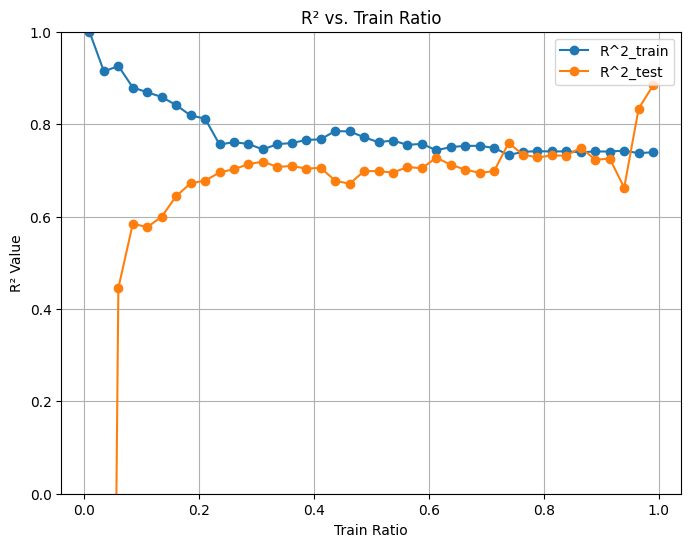

feacures coefficents
Dc  :  39.16947258651271
CRIM  :  -0.11476604708195665
ZN  :  0.040893718417730984
INDUS  :  -0.0024666980194011368
CHAS  :  3.293059731220195
NOX  :  -18.931589683811044
RM  :  3.7248394907947784
AGE  :  0.006492297297167715
DIS  :  -1.5360168534781566
RAD  :  0.32808634899164923
TAX  :  -0.013014076327498666
PTRATIO  :  -0.9545091008457001
Black  :  0.0067602198983938155
LSTAT  :  -0.5597369948097359


In [4]:

train_ratio_vec=np.linspace(0.01,0.99,40)
alpha=100
R_2_test_ls=[]
R_2_train_ls=[]
RMSE_test_ls=[]
RMSE_train_ls=[]
for i in train_ratio_vec:
    W_ml,R_2_test,R_2_train,RMSE_test,RMSE_train=linear_regression('Boston.csv',1-i)
    RMSE_train_ls=RMSE_train_ls+[RMSE_train]
    R_2_test_ls=R_2_test_ls+[R_2_test]
    R_2_train_ls=R_2_train_ls+[R_2_train]
    RMSE_test_ls=RMSE_test_ls+[RMSE_test]
RMSE_train_ls=np.array(RMSE_train_ls)
R_2_test_ls=np.array(R_2_test_ls)
R_2_train_ls=np.array(R_2_train_ls)
RMSE_test_ls=np.array(RMSE_test_ls)
scenario_labels = ['R^2_train', 'R^2_test']

plot_multiple_r2_on_same_axis(train_ratio_vec, [R_2_train_ls,R_2_test_ls], scenario_labels,[0,1],'Train Ratio','R² Value','R² vs. Train Ratio',0)
W_ml,R_2_test,R_2_train,RMSE_test,RMSE_train=linear_regression('Boston.csv',0.23)
feature_names = [
    "Dc","CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO","Black", "LSTAT"
]
print("feacures coefficents")
for i in range(len (W_ml)):
    print(feature_names[i]," : ",W_ml[i])

**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

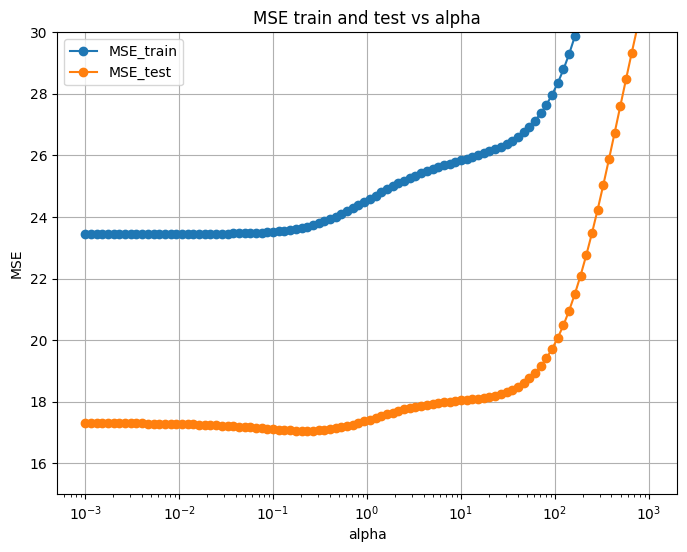

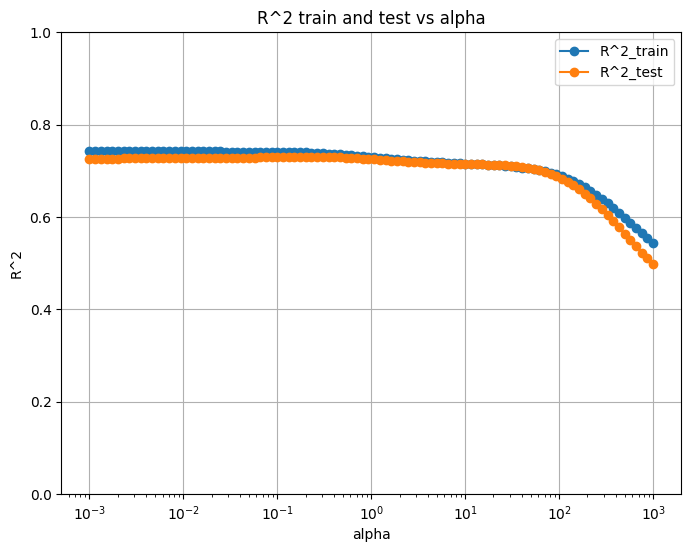

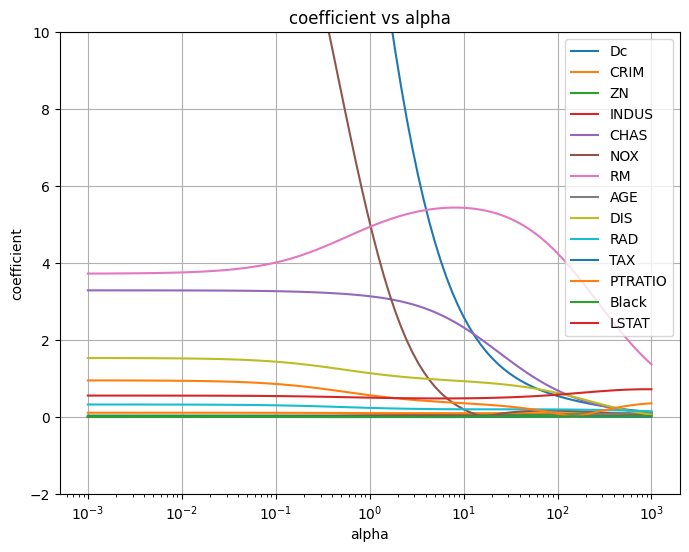

for train ratio = 0.23 and alpha = 0.3
R_2_test :  0.7301197919662354   --   R_2_train :  0.7379892546996171
feacures coefficents
Dc  :  25.493729406867033
CRIM  :  -0.10947357450678835
ZN  :  0.04271986670715372
INDUS  :  -0.02380185748651814
CHAS  :  3.235445167534042
NOX  :  -11.017778622526535
RM  :  4.388296240405033
AGE  :  0.0016750311466462442
DIS  :  -1.3175471417230131
RAD  :  0.2793962446092664
TAX  :  -0.012280102316946213
PTRATIO  :  -0.742652648535227
Black  :  0.008691314586274146
LSTAT  :  -0.5306420154739264


In [5]:
## Write your code here ##
train_ratio=0.23
alphas=10**(np.linspace(-3,3,100))
R_2_test_ls=[]
R_2_train_ls=[]
RMSE_test_ls=[]
RMSE_train_ls=[]
W_Ridg_ls=[]
for i in alphas:
    W_Ridg,R_2_test,R_2_train,RMSE_test,RMSE_train=Ridge_Regression('Boston.csv',train_ratio,i)
    W_Ridg_ls=W_Ridg_ls+[W_Ridg]
    RMSE_train_ls=RMSE_train_ls+[RMSE_train]
    R_2_test_ls=R_2_test_ls+[R_2_test]
    R_2_train_ls=R_2_train_ls+[R_2_train]
    RMSE_test_ls=RMSE_test_ls+[RMSE_test]
RMSE_train_ls=np.array(RMSE_train_ls)
R_2_test_ls=np.array(R_2_test_ls)
R_2_train_ls=np.array(R_2_train_ls)
RMSE_test_ls=np.array(RMSE_test_ls)
scenario_labels = ['MSE_train', 'MSE_test']
plot_multiple_r2_on_same_axis(alphas, [RMSE_train_ls**2,RMSE_test_ls**2], scenario_labels,[15,30],'alpha','MSE','MSE train and test vs alpha',1)

scenario_labels = ['R^2_train', 'R^2_test']
plot_multiple_r2_on_same_axis(alphas, [R_2_train_ls,R_2_test_ls], scenario_labels,[0,1],'alpha','R^2','R^2 train and test vs alpha',1)


feature_names = [
    "Dc","CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO","Black", "LSTAT"
]
W_Ridg_ls=np.matrix(W_Ridg_ls)
#print(np.shape(W_Ridg_ls[:,0]))
W_Ridg_ls=np.abs(W_Ridg_ls)
plot_multiple_r2_on_same_axis(alphas,[W_Ridg_ls[:,0],W_Ridg_ls[:,1],W_Ridg_ls[:,2],W_Ridg_ls[:,3],W_Ridg_ls[:,4],W_Ridg_ls[:,5],W_Ridg_ls[:,6],W_Ridg_ls[:,7],W_Ridg_ls[:,8],W_Ridg_ls[:,9],W_Ridg_ls[:,10],W_Ridg_ls[:,11],W_Ridg_ls[:,12],W_Ridg_ls[:,13]], feature_names,[-2,10],'alpha','coefficient','coefficient vs alpha',2)

W_Ridg,R_2_test,R_2_train,RMSE_test,RMSE_train=Ridge_Regression('Boston.csv',0.23,0.3)
print("for train ratio = 0.23 and alpha = 0.3")
print("R_2_test : ",R_2_test,"  --   R_2_train : ",R_2_train)
print("feacures coefficents")
for i in range(len (W_Ridg)):
    print(feature_names[i]," : ",W_Ridg[i])

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

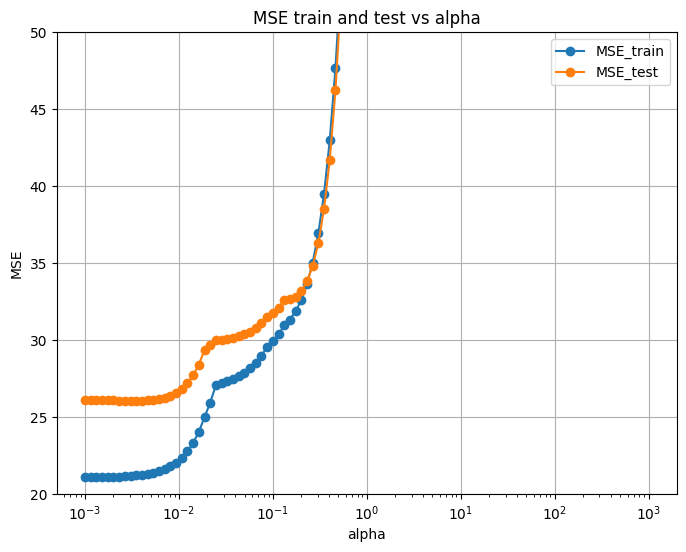

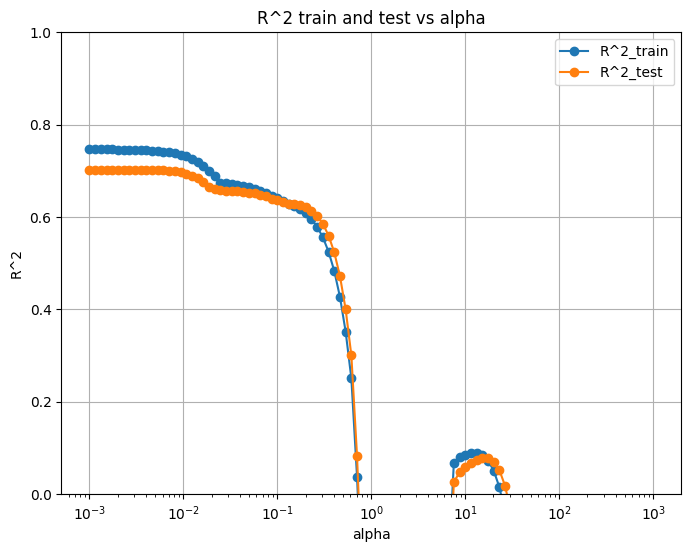

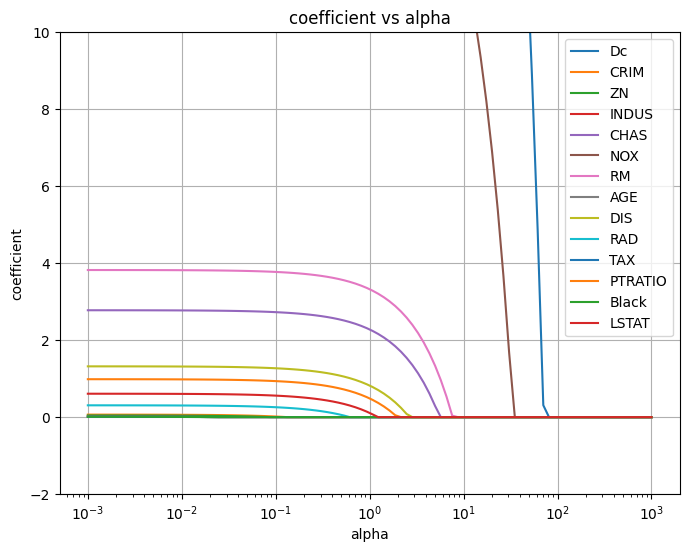

for train ratio = 0.23 and alpha = 0.1
R_2_test :  0.636796715827598   --   R_2_train :  0.6400352619666723
feacures coefficents
Dc  :  35.53324081257547
CRIM  :  -0.01579711514206243
ZN  :  0.0
INDUS  :  0.0
CHAS  :  2.726434997284456
NOX  :  -16.892247502435605
RM  :  3.7712642464534385
AGE  :  0.0
DIS  :  -1.2692615777579144
RAD  :  0.2572141965579679
TAX  :  0.0
PTRATIO  :  -0.9352493001299915
Black  :  0.0
LSTAT  :  -0.5583145259902842


In [6]:
## Write your code here ##
train_ratio=0.23
alphas=10**(np.linspace(-3,3,100))
R_2_test_ls=[]
R_2_train_ls=[]
RMSE_test_ls=[]
RMSE_train_ls=[]
W_Ridg_ls=[]
for i in alphas:
    W_Ridg,R_2_test,R_2_train,RMSE_test,RMSE_train=Lasso_Regression('Boston.csv',train_ratio,i)
    W_Ridg_ls=W_Ridg_ls+[W_Ridg]
    RMSE_train_ls=RMSE_train_ls+[RMSE_train]
    R_2_test_ls=R_2_test_ls+[R_2_test]
    R_2_train_ls=R_2_train_ls+[R_2_train]
    RMSE_test_ls=RMSE_test_ls+[RMSE_test]
RMSE_train_ls=np.array(RMSE_train_ls)
R_2_test_ls=np.array(R_2_test_ls)
R_2_train_ls=np.array(R_2_train_ls)
RMSE_test_ls=np.array(RMSE_test_ls)
scenario_labels = ['MSE_train', 'MSE_test']
plot_multiple_r2_on_same_axis(alphas, [RMSE_train_ls**2,RMSE_test_ls**2], scenario_labels,[20,50],'alpha','MSE','MSE train and test vs alpha',1)


scenario_labels = ['R^2_train', 'R^2_test']
plot_multiple_r2_on_same_axis(alphas, [R_2_train_ls,R_2_test_ls], scenario_labels,[0,1],'alpha','R^2','R^2 train and test vs alpha',1)


feature_names = [
    "Dc","CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO","Black", "LSTAT"
]
W_Ridg_ls=np.matrix(W_Ridg_ls)
#print(np.shape(W_Ridg_ls[:,0]))
W_Ridg_ls=np.abs(W_Ridg_ls)
plot_multiple_r2_on_same_axis(alphas,[W_Ridg_ls[:,0],W_Ridg_ls[:,1],W_Ridg_ls[:,2],W_Ridg_ls[:,3],W_Ridg_ls[:,4],W_Ridg_ls[:,5],W_Ridg_ls[:,6],W_Ridg_ls[:,7],W_Ridg_ls[:,8],W_Ridg_ls[:,9],W_Ridg_ls[:,10],W_Ridg_ls[:,11],W_Ridg_ls[:,12],W_Ridg_ls[:,13]], feature_names,[-2,10],'alpha','coefficient','coefficient vs alpha',2)

W_Ridg,R_2_test,R_2_train,RMSE_test,RMSE_train=Lasso_Regression('Boston.csv',0.23,0.1)
print("for train ratio = 0.23 and alpha = 0.1")
print("R_2_test : ",R_2_test,"  --   R_2_train : ",R_2_train)
print("feacures coefficents")
for i in range(len (W_Ridg)):
    print(feature_names[i]," : ",W_Ridg[i])




**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?<br>
**Feature Selection:**<br>
Lasso regression is commonly employed for feature selection. When you have a large set of variables but only a small subset of them are truly important, lasso can automatically identify and retain the most relevant features while discarding the less significant ones1.
By adding a penalty term to the residual sum of squares (RSS), lasso encourages sparsity within the model. This sparsity promotes automatic feature selection, making it an excellent choice when dealing with high-dimensional data.

In [5]:
## Write your code here ##
# we implemented it higher up,in coefitients plot we can see when a feature is deleted(when coefitient related to that is zero)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?<br>
As we can see for low train to test ratio ML stimation is overfitted and in some cases is even worse than Lasso and Ridge is doing much better then other
models, as the train ratio gets bigger the gap becomes less and for high train to test ratio ML almost becomes the same as 
Ridge but lasso is commenly worse then other models because it ignores some features but it is still not that bad
specially for low train to test ratio.

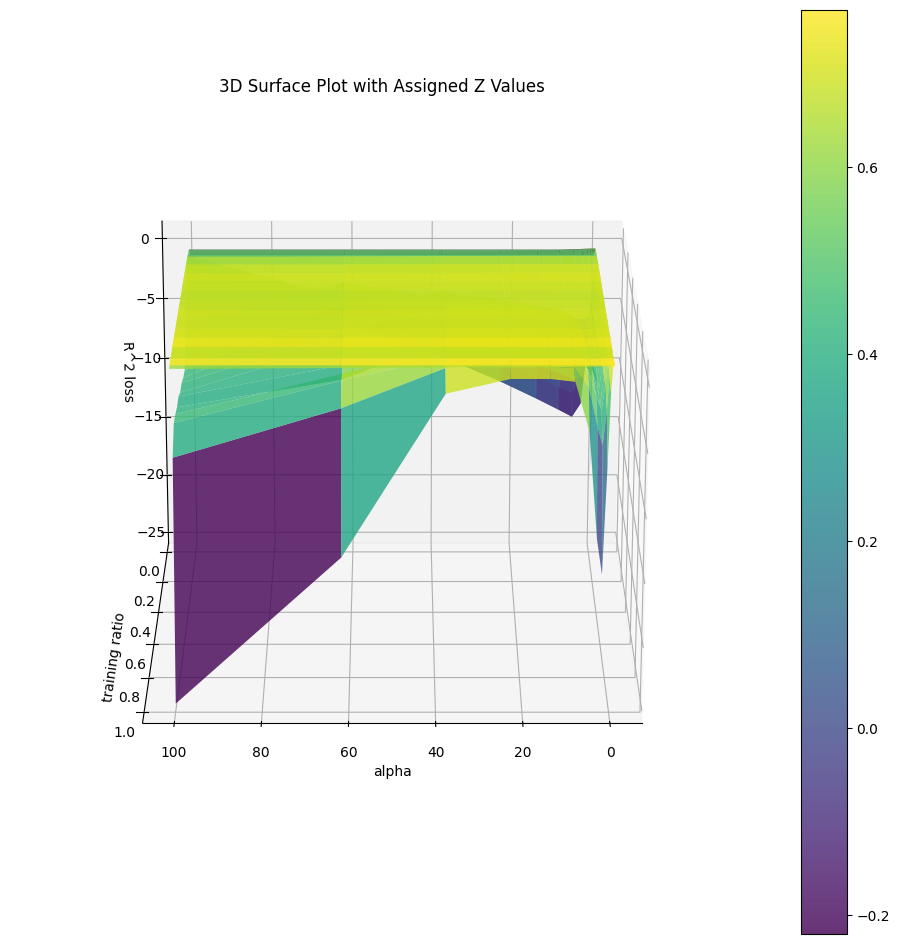

In [7]:
## Write you code here ##
n=15
m=20
alphas=10**(np.linspace(-2,2,m))
train_ratio_vec=np.linspace(0.01,0.99,n)
Z_ML=np.zeros((n, m))
Z_lasso=np.zeros((n, m))
y_lasso=np.zeros(n)
Z_Ridg=np.zeros((n, m))
y_Ridg=np.zeros(n)
alphas_Ridg=np.zeros(n)
alphas_lasso=np.zeros(n)
#print(np.shape(Z))
for i in range(len(train_ratio_vec)):
    lasso_max=-1
    Ridg_max=-1
    for j in range(len(alphas)):
        W_lasso,Z_lasso[i,j],R_2_train,RMSE_test,RMSE_train=Lasso_Regression('Boston.csv',1-train_ratio_vec[i],alphas[j])
        W_Ridg,Z_Ridg[i,j],R_2_train,RMSE_test,RMSE_train=Ridge_Regression('Boston.csv',1-train_ratio_vec[i],alphas[j])
        W_ml,Z_ML[i,j],R_2_train,RMSE_test,RMSE_train=linear_regression('Boston.csv',1-train_ratio_vec[i])
    


# Create a 3D surface plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid( alphas,train_ratio_vec)

# Plot the surface
surf = ax.plot_surface(X, Y, Z_lasso, cmap='viridis', rstride=1, cstride=1, alpha=0.8)
surf = ax.plot_surface(X, Y,Z_ML, cmap='viridis', rstride=1, cstride=1, alpha=0.8)
surf = ax.plot_surface(X, Y, Z_Ridg, cmap='viridis', rstride=1, cstride=1, alpha=0.8)


# Customize plot labels
ax.set_xlabel('alpha')
ax.set_ylabel('training ratio')
ax.set_zlabel('R^2 loss')

# Add a color bar
fig.colorbar(surf)
ax.view_init(20, 90)

# Show the plot
plt.title('3D Surface Plot with Assigned Z Values')
plt.show()

In [39]:
n=20
m=20
alphas=10**(np.linspace(-1.8,2,m))
train_ratio_vec=np.linspace(0.1,0.9,n)
Z_ML=np.zeros((n, m))
Z_lasso=np.zeros((n, m))
Z_Ridg=np.zeros((n, m))
#print(np.shape(Z))
for i in range(len(train_ratio_vec)):
    for j in range(len(alphas)):
        W_lasso,Z_lasso[i,j],R_2_train,RMSE_test,RMSE_train=Lasso_Regression('Boston.csv',1-train_ratio_vec[i],alphas[j])
        W_Ridg,Z_Ridg[i,j],R_2_train,RMSE_test,RMSE_train=Ridge_Regression('Boston.csv',1-train_ratio_vec[i],alphas[j])
        W_ml,Z_ML[i,j],R_2_train,RMSE_test,RMSE_train=linear_regression('Boston.csv',1-train_ratio_vec[i])



In [8]:
from mpl_toolkits.mplot3d import Axes3D

[14 15  1  0  5  1  0  0  0  0  0  0  0  0  0  4  5  5  0  0]


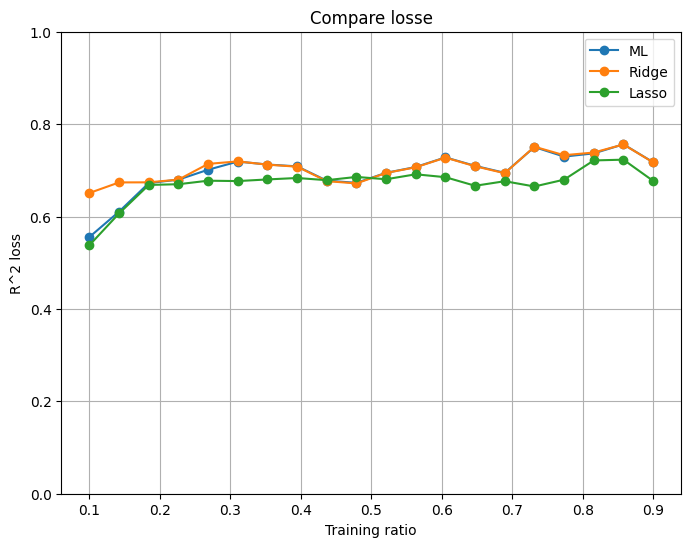

In [40]:
max_indices_lasso = Z_lasso.argmax(axis=1)
max_indices_Ridg= Z_Ridg.argmax(axis=1)
print(max_indices_Ridg)
Labels=['ML','Ridge','Lasso']
plot_multiple_r2_on_same_axis(train_ratio_vec,[Z_ML[:,0],Z_Ridg.max(axis=1,keepdims=True),Z_lasso.max(axis=1,keepdims=True)],Labels,[0,1],'Training ratio','R^2 loss','Compare losse',0)

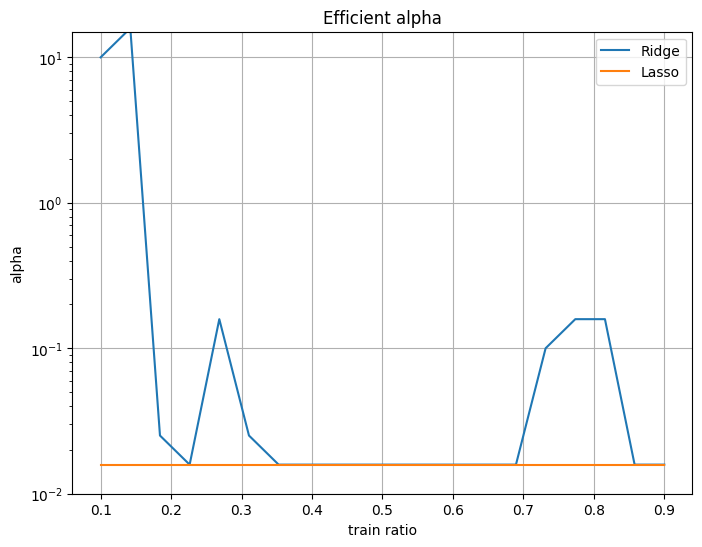

In [48]:
plot_multiple_r2_on_same_axis(train_ratio_vec,[alphas[max_indices_Ridg],alphas[max_indices_lasso]],['Ridge','Lasso'],[10**-2,15],'train ratio','alpha','Efficient alpha',3)